# Polynomial 1

https://github.com/RylanSchaeffer/Stanford-AI-Alignment-Double-Descent-Tutorial/blob/master/polynomial_regression.py

In [3]:
import os
from itertools import product
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.special
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# from src.plot import save_plot_with_multiple_extensions

# Set seed for reproducibility.
np.random.seed(0)


num_data_list = [15]
num_features_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 30, 40, 50, 100, 200]

In [4]:
num_repeat_list = list(range(30))

#results_dir = "results/polynomial_regression"
#os.makedirs(results_dir, exist_ok=True)

# Create sklearn linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)


def compute_y_from_x(X: np.ndarray):
    return np.add(2.0 * X, np.cos(X * 25))[:, 0]


In [5]:
low, high = -1.0, 1.0
num_data = 15 
mse_list = []

X_test = np.linspace(start=low, stop=high, num=1000).reshape(-1, 1)
y_test = compute_y_from_x(X_test)



In [9]:
X_test.shape, y_test.shape

((1000, 1), (1000,))

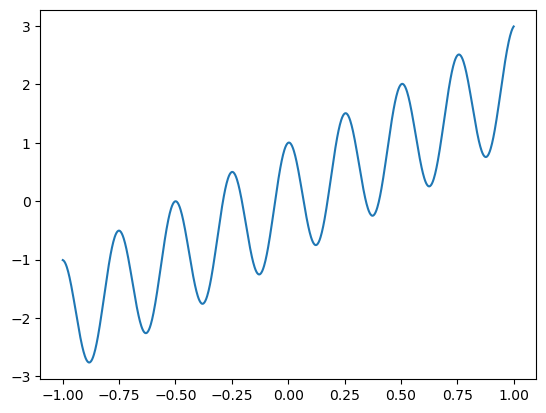

In [8]:
plt.plot(X_test, y_test)

In [14]:
i=3
num_features=num_features_list[i]
feature_degrees = 1 + np.arange(num_features).astype(int)

In [13]:
num_features

4

In [15]:
feature_degrees

array([1, 2, 3, 4])

In [17]:
# Sample training data.
X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
y_train = compute_y_from_x(X_train)

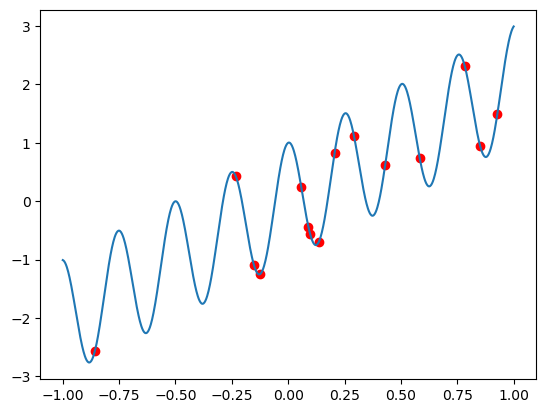

In [21]:
plt.plot(X_test, y_test)
plt.scatter(X_train, y_train, c='r')

In [22]:
#Hmm what the fuck is this? Probably worth doing something simpler/more transparent?
#Oh wait this is not the fitting part. Ah this ringing some kinda beel from some George Hotz stuff forever ago
X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)

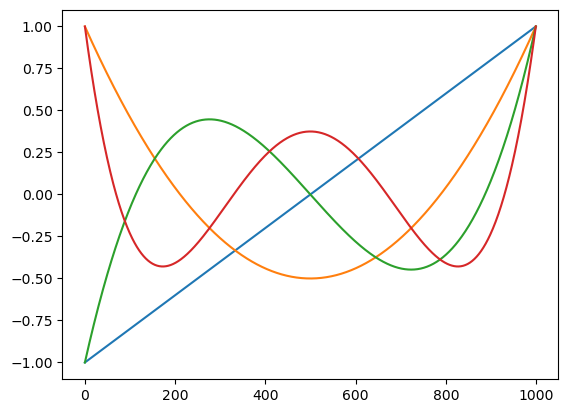

In [35]:
plt.plot(X_test_poly); #Ok yeah fuzzy on this still but I understand why it's here at least

In [39]:
beta_hat = np.linalg.pinv(X_train_poly) @ y_train #Ok yeah yeah so this is actualy solving using the pseudo inverse

In [40]:
beta_hat.shape

(4,)

In [41]:
beta_hat

array([ 2.00521048, -0.56222722,  0.80376728, -1.62654059])

In [43]:
y_train_pred = X_train_poly @ beta_hat
y_test_pred = X_test_poly @ beta_hat

In [44]:
y_train_pred.shape

(15,)

In [45]:
y_test_pred.shape

(1000,)

In [46]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

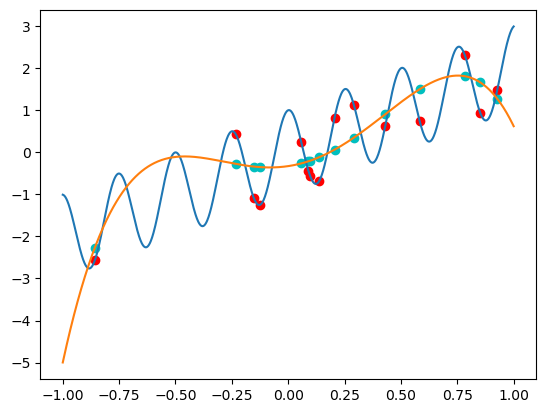

In [50]:
plt.plot(X_test, y_test)
plt.scatter(X_train, y_train, c='r')
plt.plot(X_test, y_test_pred)
plt.scatter(X_train, y_train_pred, c='c')

Ok yeah got it.

In [48]:
train_mse, test_mse

(0.3579983161132594, 0.9908531384685226)

### MOAR DEGREEEEESSSS

In [70]:
i=24
num_features=num_features_list[i]

In [71]:
num_features

25

In [72]:
feature_degrees = 1 + np.arange(num_features).astype(int)

# Sample training data.
X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
y_train = compute_y_from_x(X_train)

X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)

beta_hat = np.linalg.pinv(X_train_poly) @ y_train #Ok yeah yeah so this is actualy solving using the pseudo inverse

y_train_pred = X_train_poly @ beta_hat
y_test_pred = X_test_poly @ beta_hat

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

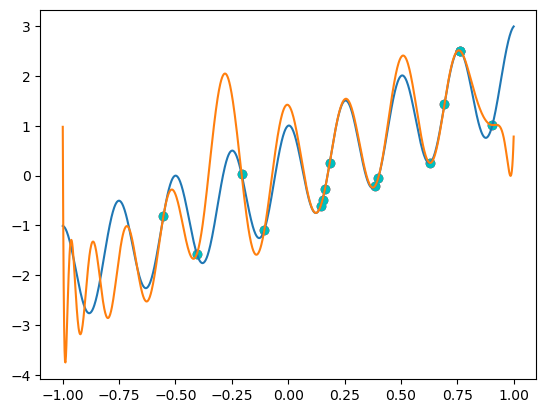

In [73]:
plt.plot(X_test, y_test)
plt.scatter(X_train, y_train, c='r')
plt.plot(X_test, y_test_pred)
plt.scatter(X_train, y_train_pred, c='c')

In [69]:
train_mse, test_mse

(1.441100352541244e-30, 0.45187121077206654)

- AAAAH THAT's SO CRAZY -> WHY IS IT HAPENING?!
- An animated version cranking up the degrees could be cool. 

In [86]:
test_errors=[]
training_errors=[]
for i in range(len(num_features_list)):
    num_features=num_features_list[i]
    feature_degrees = 1 + np.arange(num_features).astype(int)

    # Sample training data.
    X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
    y_train = compute_y_from_x(X_train)
    
    X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
    X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)
    
    beta_hat = np.linalg.pinv(X_train_poly) @ y_train #Ok yeah yeah so this is actualy solving using the pseudo inverse
    
    y_train_pred = X_train_poly @ beta_hat
    y_test_pred = X_test_poly @ beta_hat
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    test_errors.append(test_mse)
    training_errors.append(train_mse)

(0.0, 2.0)

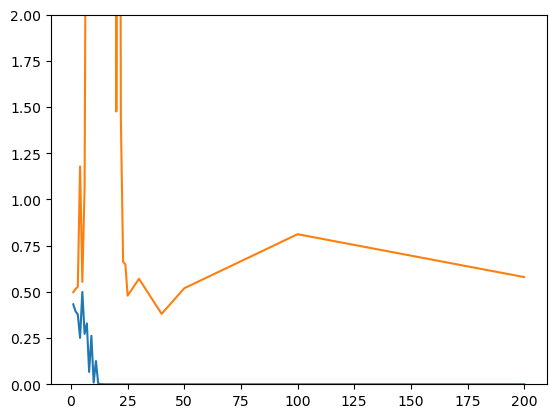

In [88]:
plt.plot(num_features_list, training_errors)
plt.plot(num_features_list, test_errors)
plt.ylim([0, 2])

In [ ]:


        feature_degrees = 1 + np.arange(num_features).astype(int)
        for repeat_idx in num_repeat_list:
            # Sample training data.
            X_train = np.random.uniform(low=low, high=high, size=(num_data, 1))
            y_train = compute_y_from_x(X_train)

            # Fit a polynomial regression model.
            X_train_poly = scipy.special.eval_legendre(feature_degrees, X_train)
            X_test_poly = scipy.special.eval_legendre(feature_degrees, X_test)
            
            beta_hat = np.linalg.pinv(X_train_poly) @ y_train
            y_train_pred = X_train_poly @ beta_hat
            y_test_pred = X_test_poly @ beta_hat
            train_mse = mean_squared_error(y_train, y_train_pred)
            test_mse = mean_squared_error(y_test, y_test_pred)
            mse_list.append(
                {
                    "Num. Data": num_data,
                    "Num. Parameters (Num Features)": num_features,
                    "repeat_idx": repeat_idx,
                    "Train MSE": train_mse,
                    "Test MSE": test_mse,
                }
            )
            print(
                f"num_data={num_data}, num_features={num_features}, repeat_idx={repeat_idx}, train_mse={train_mse:.4f}, test_mse={test_mse:.4f}"
            )

            # Plot the polynomial fit data.
            plt.close()
            sns.lineplot(x=X_test[:, 0], y=y_test, label="True Function")
            sns.lineplot(
                x=X_test[:, 0],
                y=y_test_pred,
                label=f"Num Param={X_train_poly.shape[1]}",
            )
            sns.scatterplot(x=X_train[:, 0], y=y_train, s=30, color="k", label="Data")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.ylim(-3, 3)
            for extension in ["pdf", "png"]:
                plt.savefig(
                    os.path.join(
                        results_num_features_dir, f"repeat_idx={repeat_idx}.{extension}"
                    ),
                    bbox_inches="tight",
                    dpi=300,
                )
            # plt.show()
            plt.close()

    mse_df = pd.DataFrame(mse_list)
    mse_df.to_csv(os.path.join(results_num_data_dir, "mse.csv"), index=False)
    plt.close()
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Test MSE",
        label="Test",
    )
    sns.lineplot(
        data=mse_df,
        x="Num. Parameters (Num Features)",
        y="Train MSE",
        label="Train",
    )
    plt.ylabel("Mean Squared Error")
    plt.ylim(bottom=1e-3)
    plt.yscale("log")
    plt.xscale("log")
    plt.title("Polynomial Regression")
    plt.axvline(
        x=num_data, color="black", linestyle="--", label="Interpolation Threshold"
    )
    plt.legend()
    save_plot_with_multiple_extensions(
        plot_dir=results_num_data_dir, plot_title=f"mse_num_data={num_data}"
    )
    # plt.show()